In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [38]:
models_results = []

In [39]:
def evaluate_model(model, X_train, y_train, X_test, y_test, zone="Whole City"):
    # Predict on training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics for training data
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    
    # Calculate metrics for testing data
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Print the metrics
    print(f"Model: {model}")
    print("====== Train ========")
    print(f"Training MSE: {train_mse:.7f}")
    print(f"Training MAE: {train_mae:.7f}")
    print(f"Training R-squared: {train_r2:.7f}")
    print("====== Test ========")
    print(f"Testing MSE: {test_mse:.7f}")
    print(f"Testing MAE: {test_mae:.7f}")
    print(f"Testing R-squared: {test_r2:.7f}")
    
    new_row = {
        "Zone": zone,
        "Model": str(model),
        "Train MSE": train_mse,
        "Train MAE": train_mae,
        "Train R2": train_r2,
        "Test MSE": test_mse,
        "Test MAE": test_mae,
        "Test R2": test_r2
    }
    
  
    models_results.append(new_row)

    


In [40]:
def preprocess_data(df):
    # Melt the DataFrame to long format
    df_melted = df.melt(id_vars=['Zone', 'Model'], 
                        value_vars=['Train MSE', 'Train MAE', 'Train R2', 'Test MSE', 'Test MAE', 'Test R2'],
                        var_name='Metric', value_name='Value')

    # Split Metric into Data Type (Train/Test) and Actual Metric for easier plotting
    df_melted[['Data Type', 'Metric']] = df_melted['Metric'].str.split(' ', expand=True)
    
    return df_melted

In [41]:
def plot_results(df_melted):
   
    # Get unique metrics
    unique_metrics = df_melted['Metric'].unique()
    
    # Set the plot style
    sns.set(style="whitegrid")

    # Loop through each metric and create a separate plot
    for metric in unique_metrics:
        # Filter data for training and testing separately
        train_data = df_melted[(df_melted['Metric'] == metric) & (df_melted['Data Type'] == 'Train')]
        test_data = df_melted[(df_melted['Metric'] == metric) & (df_melted['Data Type'] == 'Test')]
        
        # Create separate plots for training and testing data
        for data, data_type in zip([train_data, test_data], ['Train', 'Test']):
            g = sns.catplot(
                data=data, kind="bar",
                x="Zone", y="Value", hue="Model",
                height=4, aspect=2, sharey=False
            )

            # Set plot titles and labels
            g.set_titles("{col_name} - " + metric)
            g.set_axis_labels(data_type + " " + str(metric), "Value")
            g.set_xticklabels(rotation=45)  
            
            # Adjust legend position and font size
            g._legend.set_bbox_to_anchor((1.1, 0.5))  
            g._legend.set_title('Model')  

            # Display the plot
            plt.tight_layout()
            plt.show()

# Test on Enhaced Data

In [42]:
df = pd.read_csv('data/data-ready.csv')

targets = ["z1", "z2", "z3"]

df.drop("DateTime", inplace=True, axis=1)

# split train and test
X = df.drop(columns=targets, axis=1)
y1 = df['z1']
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)

y2 = df['z2']
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)

y3 = df['z3']
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y3, test_size=0.2, random_state=42)

### Testing Decision Trees

In [43]:
X_train = [X1_train, X2_train, X3_train]
X_test = [X1_test, X2_test, X3_test]
y_train = [y1_train, y2_train, y3_train]
y_test = [y1_test, y2_test, y3_test]

In [44]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [45]:
models = []
predictions = []
for i in range(3):
    model = DecisionTreeRegressor()
    model.fit(X_train[i], y_train[i])
    evaluate_model(model, X_train[i], y_train[i], X_test[i], y_test[i], zone=f"Zone :{i+1}")


Model: DecisionTreeRegressor()
====== Train ========
Training MSE: 0.0000000
Training MAE: 0.0000000
Training R-squared: 1.0000000
====== Test ========
Testing MSE: 1707422.6602247
Testing MAE: 796.5148797
Testing R-squared: 0.9661859
Model: DecisionTreeRegressor()
====== Train ========
Training MSE: 0.0000000
Training MAE: 0.0000000
Training R-squared: 1.0000000
====== Test ========
Testing MSE: 748943.0436171
Testing MAE: 529.8525913
Testing R-squared: 0.9722507
Model: DecisionTreeRegressor()
====== Train ========
Training MSE: 0.0000000
Training MAE: 0.0000000
Training R-squared: 1.0000000
====== Test ========
Testing MSE: 630337.0184005
Testing MAE: 466.4774902
Testing R-squared: 0.9855442


In [46]:
df["total"] = df["z1"] + df["z2"] + df["z3"]

targetT = df["total"]
XT = df.drop(columns=["z1", "z2", "z3", "total"], axis=1)


XT_train, XT_test, yT_train, yT_test = train_test_split(XT, targetT, test_size=0.2, random_state=42)

model = DecisionTreeRegressor()
model.fit(XT_train, yT_train)
evaluate_model(model, XT_train, yT_train, XT_test, yT_test, zone="Whole City")

Model: DecisionTreeRegressor()
====== Train ========
Training MSE: 0.0000000
Training MAE: 0.0000000
Training R-squared: 1.0000000
====== Test ========
Testing MSE: 7179148.3602189
Testing MAE: 1636.7300940
Testing R-squared: 0.9753862


### Testing Random Forests

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
models_rf = []
predictions_rf = []
for i in range(3):
    model = RandomForestRegressor()
    model.fit(X_train[i], y_train[i])
    evaluate_model(model, X_train[i], y_train[i], X_test[i], y_test[i], zone=f"Zone :{i+1}")

Model: RandomForestRegressor()
====== Train ========
Training MSE: 126039.6482052
Training MAE: 230.4429430
Training R-squared: 0.9975253
====== Test ========
Testing MSE: 865852.5204554
Testing MAE: 621.1971805
Testing R-squared: 0.9828525
Model: RandomForestRegressor()
====== Train ========
Training MSE: 57616.6801372
Training MAE: 156.9142414
Training R-squared: 0.9978716
====== Test ========
Testing MSE: 401723.1768892
Testing MAE: 423.9115075
Testing R-squared: 0.9851156
Model: RandomForestRegressor()
====== Train ========
Training MSE: 49340.5730941
Training MAE: 137.2226074
Training R-squared: 0.9988764
====== Test ========
Testing MSE: 327977.7707656
Testing MAE: 364.3566484
Testing R-squared: 0.9924784


In [49]:
model_rf = RandomForestRegressor()
model_rf.fit(XT_train, yT_train)
evaluate_model(model_rf, XT_train, yT_train, XT_test, yT_test, zone="Whole City")

Model: RandomForestRegressor()
====== Train ========
Training MSE: 550362.4412824
Training MAE: 474.4166510
Training R-squared: 0.9981307
====== Test ========
Testing MSE: 3794114.3931816
Testing MAE: 1277.6421577
Testing R-squared: 0.9869919


# Next:
- cross validation
- more optimization of models + more fine tuning
- group by minute, hour, day
- test on original data

# Test on Original Data

In [50]:
df = pd.read_csv('data/data.csv')

targets = ["Zone 1 Power Consumption", "Zone 2  Power Consumption", "Zone 3  Power Consumption"]

df.drop("DateTime", inplace=True, axis=1)

# split train and test
X = df.drop(columns=targets, axis=1)
y1 = df['Zone 1 Power Consumption']
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)

y2 = df['Zone 2  Power Consumption']
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)

y3 = df['Zone 3  Power Consumption']
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y3, test_size=0.2, random_state=42)

In [51]:
X_train = [X1_train, X2_train, X3_train]
X_test = [X1_test, X2_test, X3_test]
y_train = [y1_train, y2_train, y3_train]
y_test = [y1_test, y2_test, y3_test]

In [52]:
models = []
predictions = []
for i in range(3):
    model = DecisionTreeRegressor()
    model.fit(X_train[i], y_train[i])
    evaluate_model(model, X_train[i], y_train[i], X_test[i], y_test[i], zone=f"Zone :{i+1}")

Model: DecisionTreeRegressor()
====== Train ========
Training MSE: 0.0000000
Training MAE: 0.0000000
Training R-squared: 1.0000000
====== Test ========
Testing MSE: 41996378.4320375
Testing MAE: 3893.9310046
Testing R-squared: 0.1682961
Model: DecisionTreeRegressor()
====== Train ========
Training MSE: 0.0000000
Training MAE: 0.0000000
Training R-squared: 1.0000000
====== Test ========
Testing MSE: 22523131.2401170
Testing MAE: 2950.7280787
Testing R-squared: 0.1654895
Model: DecisionTreeRegressor()
====== Train ========
Training MSE: 0.0000000
Training MAE: 0.0000000
Training R-squared: 1.0000000
====== Test ========
Testing MSE: 23770310.3310190
Testing MAE: 2923.9790556
Testing R-squared: 0.4548660


In [53]:
df["total"] = df["Zone 1 Power Consumption"] + df["Zone 2  Power Consumption"] + df["Zone 3  Power Consumption"]

targetT = df["total"]
XT = df.drop(columns=["Zone 1 Power Consumption", "Zone 2  Power Consumption", "Zone 3  Power Consumption", "total"], axis=1)


XT_train, XT_test, yT_train, yT_test = train_test_split(XT, targetT, test_size=0.2, random_state=42)

model = DecisionTreeRegressor()
model.fit(XT_train, yT_train)
evaluate_model(model, XT_train, yT_train, XT_test, yT_test, zone="Whole City")

Model: DecisionTreeRegressor()
====== Train ========
Training MSE: 0.0000000
Training MAE: 0.0000000
Training R-squared: 1.0000000
====== Test ========
Testing MSE: 217374661.1537534
Testing MAE: 8694.9937213
Testing R-squared: 0.2547294


In [54]:
models_rf = []
predictions_rf = []
for i in range(3):
    model = RandomForestRegressor()
    model.fit(X_train[i], y_train[i])
    evaluate_model(model, X_train[i], y_train[i], X_test[i], y_test[i], zone=f"Zone :{i+1}")

Model: RandomForestRegressor()
====== Train ========
Training MSE: 3060759.0179948
Training MAE: 1191.7478144
Training R-squared: 0.9399032
====== Test ========
Testing MSE: 21615046.9658852
Testing MAE: 3214.7338459
Testing R-squared: 0.5719317
Model: RandomForestRegressor()
====== Train ========
Training MSE: 1638471.2247953
Training MAE: 883.1347314
Training R-squared: 0.9394742
====== Test ========
Testing MSE: 11473176.5925291
Testing MAE: 2374.2819917
Testing R-squared: 0.5749043
Model: RandomForestRegressor()
====== Train ========
Training MSE: 1743245.0753634
Training MAE: 901.4310792
Training R-squared: 0.9603023
====== Test ========
Testing MSE: 12659698.9964809
Testing MAE: 2462.9290028
Testing R-squared: 0.7096701


In [55]:
model_rf = RandomForestRegressor()
model_rf.fit(XT_train, yT_train)
evaluate_model(model_rf, XT_train, yT_train, XT_test, yT_test, zone="Whole City")

Model: RandomForestRegressor()
====== Train ========
Training MSE: 15088688.9178675
Training MAE: 2618.3281584
Training R-squared: 0.9487524
====== Test ========
Testing MSE: 107117000.4298872
Testing MAE: 7101.7704010
Testing R-squared: 0.6327486


we can clearly see the effect of added features on the scores

# Testing XGBoost

In [56]:
df = pd.read_csv('data/data-ready.csv')

targets = ["z1", "z2", "z3"]

df.drop("DateTime", inplace=True, axis=1)

# split train and test
X = df.drop(columns=targets, axis=1)
y1 = df['z1']
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)

y2 = df['z2']
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)

y3 = df['z3']
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y3, test_size=0.2, random_state=42)

X_train = [X1_train, X2_train, X3_train]
X_test = [X1_test, X2_test, X3_test]
y_train = [y1_train, y2_train, y3_train]
y_test = [y1_test, y2_test, y3_test]
models = []
predictions = []
for i in range(3):
    model = XGBRegressor()
    model.fit(X_train[i], y_train[i])
    evaluate_model(model, X_train[i], y_train[i], X_test[i], y_test[i], zone=f"Zone :{i+1}")


Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
====== Train ========
Training MSE: 957357.6845976
Training MAE: 723.3298231
Training R-squared: 0.9812027
====== Test ========
Testing MSE: 1269055.5760206
Testing MAE: 824.3279437
Testing R-squared: 0.9748674
Model: XGBRegressor(base_score=None, boos

In [57]:
df["total"] = df["z1"] + df["z2"] + df["z3"]

targetT = df["total"]
XT = df.drop(columns=["z1", "z2", "z3", "total"], axis=1)


XT_train, XT_test, yT_train, yT_test = train_test_split(XT, targetT, test_size=0.2, random_state=42)

model = XGBRegressor()
model.fit(XT_train, yT_train)
evaluate_model(model, XT_train, yT_train, XT_test, yT_test, zone="Whole City")

Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
====== Train ========
Training MSE: 3919002.6040780
Training MAE: 1443.5872308
Training R-squared: 0.9866894
====== Test ========
Testing MSE: 5253591.0078917
Testing MAE: 1666.1210622
Testing R-squared: 0.9819880


# Testing AdaBoost

In [59]:
from sklearn.ensemble import AdaBoostRegressor

df = pd.read_csv('data/data-ready.csv')

targets = ["z1", "z2", "z3"]

df.drop("DateTime", inplace=True, axis=1)

# split train and test
X = df.drop(columns=targets, axis=1)
y1 = df['z1']
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)

y2 = df['z2']
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)

y3 = df['z3']
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y3, test_size=0.2, random_state=42)

X_train = [X1_train, X2_train, X3_train]
X_test = [X1_test, X2_test, X3_test]
y_train = [y1_train, y2_train, y3_train]
y_test = [y1_test, y2_test, y3_test]
models = []
predictions = []
for i in range(3):
    model = AdaBoostRegressor()
    model.fit(X_train[i], y_train[i])
    evaluate_model(model, X_train[i], y_train[i], X_test[i], y_test[i], zone=f"Zone :{i+1}")


Model: AdaBoostRegressor()
====== Train ========
Training MSE: 9307751.5815979
Training MAE: 2493.8449992
Training R-squared: 0.8172461
====== Test ========
Testing MSE: 9119378.6419070
Testing MAE: 2471.8061251
Testing R-squared: 0.8193982
Model: AdaBoostRegressor()
====== Train ========
Training MSE: 5638006.2512669
Training MAE: 1939.6252964
Training R-squared: 0.7917296
====== Test ========
Testing MSE: 5580959.7997349
Testing MAE: 1926.6788804
Testing R-squared: 0.7932184
Model: AdaBoostRegressor()
====== Train ========
Training MSE: 7384349.1278072
Training MAE: 2237.7425764
Training R-squared: 0.8318412
====== Test ========
Testing MSE: 7327759.1886087
Testing MAE: 2229.0604304
Testing R-squared: 0.8319496


In [60]:
df["total"] = df["z1"] + df["z2"] + df["z3"]

targetT = df["total"]
XT = df.drop(columns=["z1", "z2", "z3", "total"], axis=1)


XT_train, XT_test, yT_train, yT_test = train_test_split(XT, targetT, test_size=0.2, random_state=42)

model = AdaBoostRegressor()
model.fit(XT_train, yT_train)
evaluate_model(model, XT_train, yT_train, XT_test, yT_test, zone="Whole City")

Model: AdaBoostRegressor()
====== Train ========
Training MSE: 52242906.5761294
Training MAE: 5928.7271309
Training R-squared: 0.8225608
====== Test ========
Testing MSE: 51514251.1963584
Testing MAE: 5891.5822848
Testing R-squared: 0.8233830


## Using StandardScaler

In [62]:
from sklearn.preprocessing import StandardScaler

In [65]:
df = pd.read_csv('data/data-ready.csv')

targets = ["z1", "z2", "z3"]

df.drop("DateTime", inplace=True, axis=1)

# split train and test
X = df.drop(columns=targets, axis=1)
X = StandardScaler().fit_transform(X)
y1 = df['z1']
y1 = StandardScaler().fit_transform(y1.values.reshape(-1, 1))
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)

y2 = df['z2']
y2 = StandardScaler().fit_transform(y2.values.reshape(-1, 1))
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)

y3 = df['z3']
y3 = StandardScaler().fit_transform(y3.values.reshape(-1, 1))
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y3, test_size=0.2, random_state=42)

X_train = [X1_train, X2_train, X3_train]
X_test = [X1_test, X2_test, X3_test]
y_train = [y1_train, y2_train, y3_train]
y_test = [y1_test, y2_test, y3_test]
models = []
predictions = []
for i in range(3):
    model = AdaBoostRegressor()
    model.fit(X_train[i], y_train[i])
    evaluate_model(model, X_train[i], y_train[i], X_test[i], y_test[i], zone=f"Zone :{i+1}")


/home/chaker/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: AdaBoostRegressor()
====== Train ========
Training MSE: 0.1689039
Training MAE: 0.3351537
Training R-squared: 0.8313832
====== Test ========
Testing MSE: 0.1639688
Testing MAE: 0.3308027
Testing R-squared: 0.8348961


/home/chaker/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: AdaBoostRegressor()
====== Train ========
Training MSE: 0.2063684
Training MAE: 0.3704629
Training R-squared: 0.7937527
====== Test ========
Testing MSE: 0.2041702
Testing MAE: 0.3679415
Testing R-squared: 0.7953374


/home/chaker/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: AdaBoostRegressor()
====== Train ========
Training MSE: 0.1747454
Training MAE: 0.3456663
Training R-squared: 0.8254962
====== Test ========
Testing MSE: 0.1736857
Testing MAE: 0.3455153
Testing R-squared: 0.8253276


In [66]:
df["total"] = df["z1"] + df["z2"] + df["z3"]

targetT = df["total"]
targetT = StandardScaler().fit_transform(targetT.values.reshape(-1, 1))
XT = df.drop(columns=["z1", "z2", "z3", "total"], axis=1)
XT = StandardScaler().fit_transform(XT)


XT_train, XT_test, yT_train, yT_test = train_test_split(XT, targetT, test_size=0.2, random_state=42)

model = AdaBoostRegressor()
model.fit(XT_train, yT_train)
evaluate_model(model, XT_train, yT_train, XT_test, yT_test, zone="Whole City")

/home/chaker/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: AdaBoostRegressor()
====== Train ========
Training MSE: 0.1701551
Training MAE: 0.3357366
Training R-squared: 0.8301601
====== Test ========
Testing MSE: 0.1662215
Testing MAE: 0.3322997
Testing R-squared: 0.8325194


## Fine Tuning AdaBoost

In [67]:
from sklearn.model_selection import GridSearchCV

In [69]:
df["total"] = df["z1"] + df["z2"] + df["z3"]

targetT = df["total"]
targetT = StandardScaler().fit_transform(targetT.values.reshape(-1, 1))
XT = df.drop(columns=["z1", "z2", "z3", "total"], axis=1)
XT = StandardScaler().fit_transform(XT)


XT_train, XT_test, yT_train, yT_test = train_test_split(XT, targetT, test_size=0.2, random_state=42)

params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'loss': ['linear', 'square', 'exponential']
}
model = GridSearchCV(AdaBoostRegressor(), params, cv=3)
model.fit(XT_train, yT_train)
print("Grid Search resutls: ",model.best_params_)

/home/chaker/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/chaker/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/chaker/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/chaker/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y 

Grid Search resutls:  {'learning_rate': 1, 'loss': 'square', 'n_estimators': 50}


In [71]:
df = pd.read_csv('data/data-ready.csv')

targets = ["z1", "z2", "z3"]

df.drop("DateTime", inplace=True, axis=1)

# split train and test
X = df.drop(columns=targets, axis=1)
X = StandardScaler().fit_transform(X)
y1 = df['z1']
y1 = StandardScaler().fit_transform(y1.values.reshape(-1, 1))
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)

y2 = df['z2']
y2 = StandardScaler().fit_transform(y2.values.reshape(-1, 1))
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)

y3 = df['z3']
y3 = StandardScaler().fit_transform(y3.values.reshape(-1, 1))
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y3, test_size=0.2, random_state=42)

X_train = [X1_train, X2_train, X3_train]
X_test = [X1_test, X2_test, X3_test]
y_train = [y1_train, y2_train, y3_train]
y_test = [y1_test, y2_test, y3_test]
models = []
predictions = []
for i in range(3):
    model = AdaBoostRegressor(loss='square', n_estimators=50, learning_rate=1)
    model.fit(X_train[i], y_train[i])
    evaluate_model(model, X_train[i], y_train[i], X_test[i], y_test[i], zone=f"Zone :{i+1}")

/home/chaker/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: AdaBoostRegressor(learning_rate=1, loss='square')
====== Train ========
Training MSE: 0.1714247
Training MAE: 0.3370912
Training R-squared: 0.8288666
====== Test ========
Testing MSE: 0.1662985
Testing MAE: 0.3320713
Testing R-squared: 0.8325503


/home/chaker/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: AdaBoostRegressor(learning_rate=1, loss='square')
====== Train ========
Training MSE: 0.1974783
Training MAE: 0.3629895
Training R-squared: 0.8026375
====== Test ========
Testing MSE: 0.1959156
Testing MAE: 0.3616136
Testing R-squared: 0.8036118


/home/chaker/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: AdaBoostRegressor(learning_rate=1, loss='square')
====== Train ========
Training MSE: 0.1895407
Training MAE: 0.3685225
Training R-squared: 0.8107214
====== Test ========
Testing MSE: 0.1911657
Testing MAE: 0.3695961
Testing R-squared: 0.8077483


In [72]:
df["total"] = df["z1"] + df["z2"] + df["z3"]

targetT = df["total"]
targetT = StandardScaler().fit_transform(targetT.values.reshape(-1, 1))
XT = df.drop(columns=["z1", "z2", "z3", "total"], axis=1)
XT = StandardScaler().fit_transform(XT)


XT_train, XT_test, yT_train, yT_test = train_test_split(XT, targetT, test_size=0.2, random_state=42)

model = AdaBoostRegressor(loss='square', n_estimators=50, learning_rate=1)
model.fit(XT_train, yT_train)
evaluate_model(model, XT_train, yT_train, XT_test, yT_test, zone="Whole City")

/home/chaker/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: AdaBoostRegressor(learning_rate=1, loss='square')
====== Train ========
Training MSE: 0.1661304
Training MAE: 0.3341094
Training R-squared: 0.8341774
====== Test ========
Testing MSE: 0.1633957
Testing MAE: 0.3314977
Testing R-squared: 0.8353665


# Evaluation

/home/chaker/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_6652/248893769.py:33: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


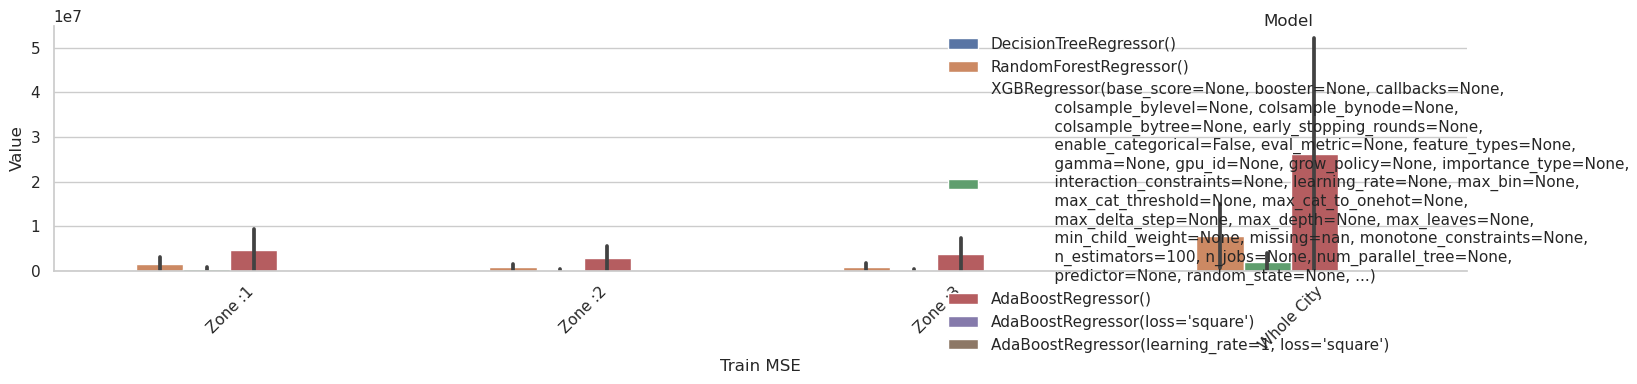

/home/chaker/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_6652/248893769.py:33: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


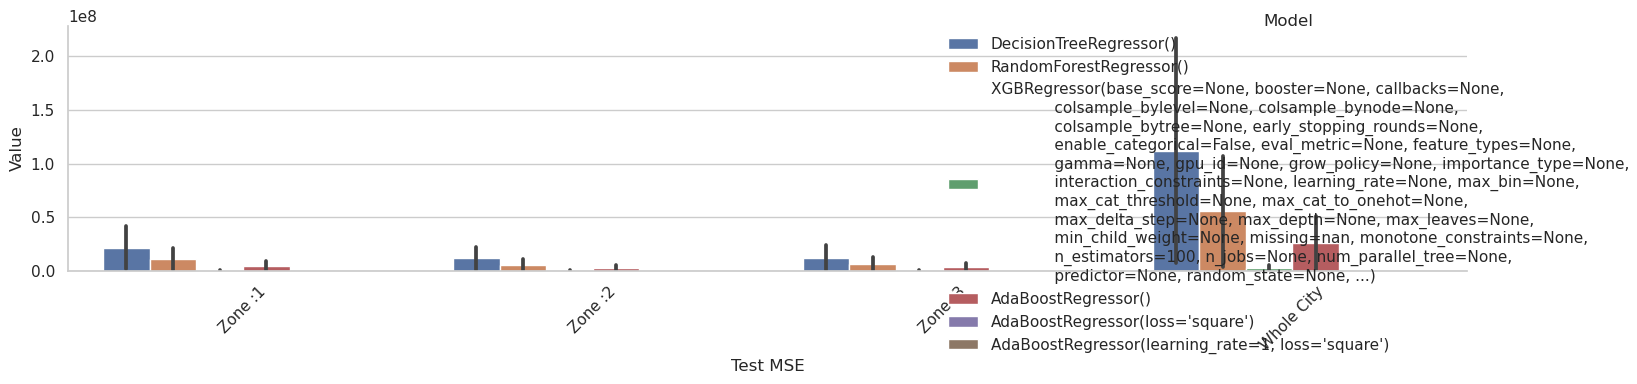

/home/chaker/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_6652/248893769.py:33: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


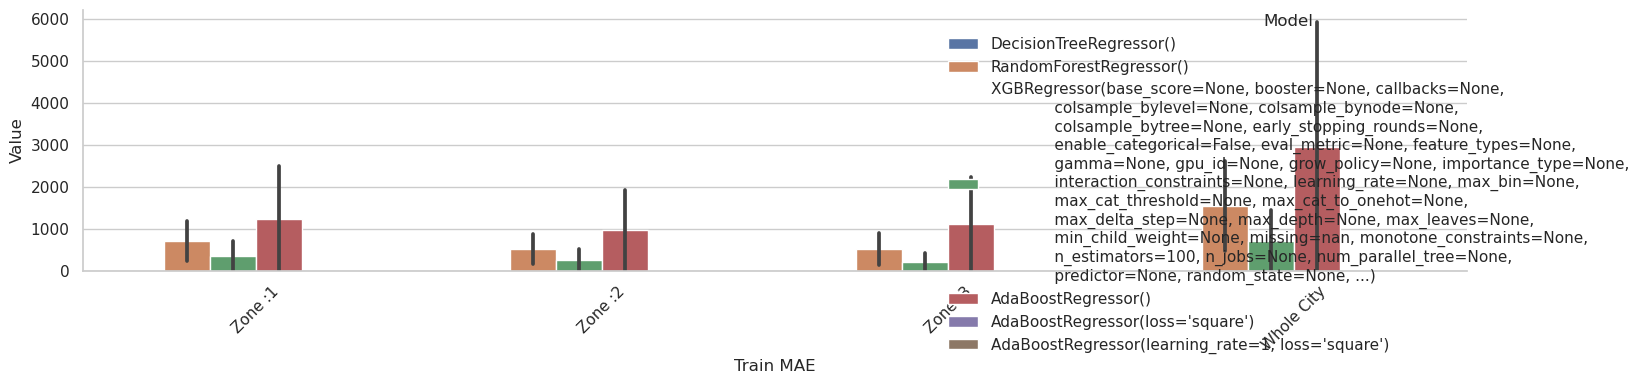

/home/chaker/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_6652/248893769.py:33: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


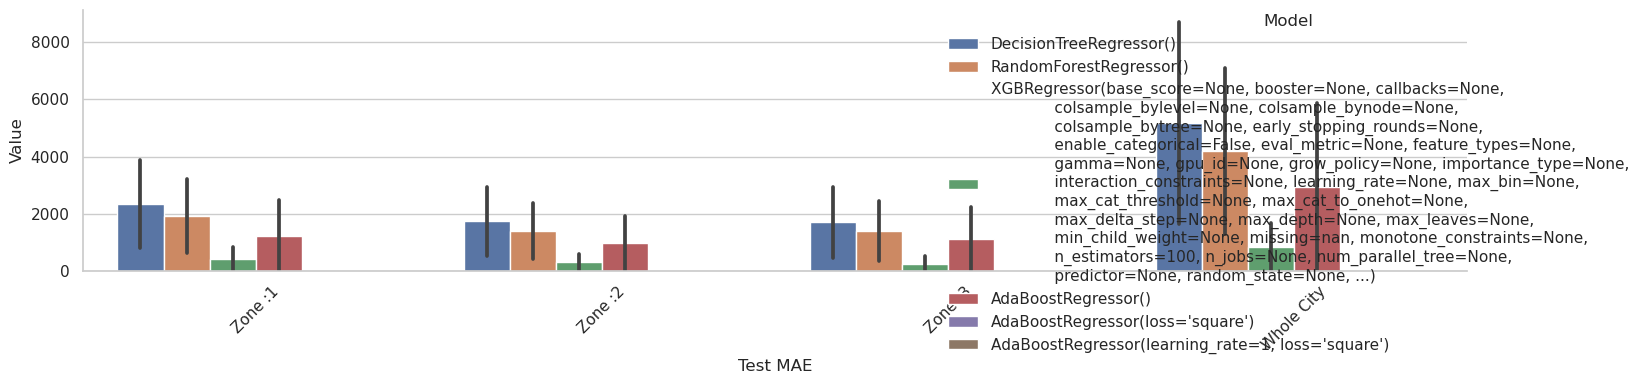

/home/chaker/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_6652/248893769.py:33: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


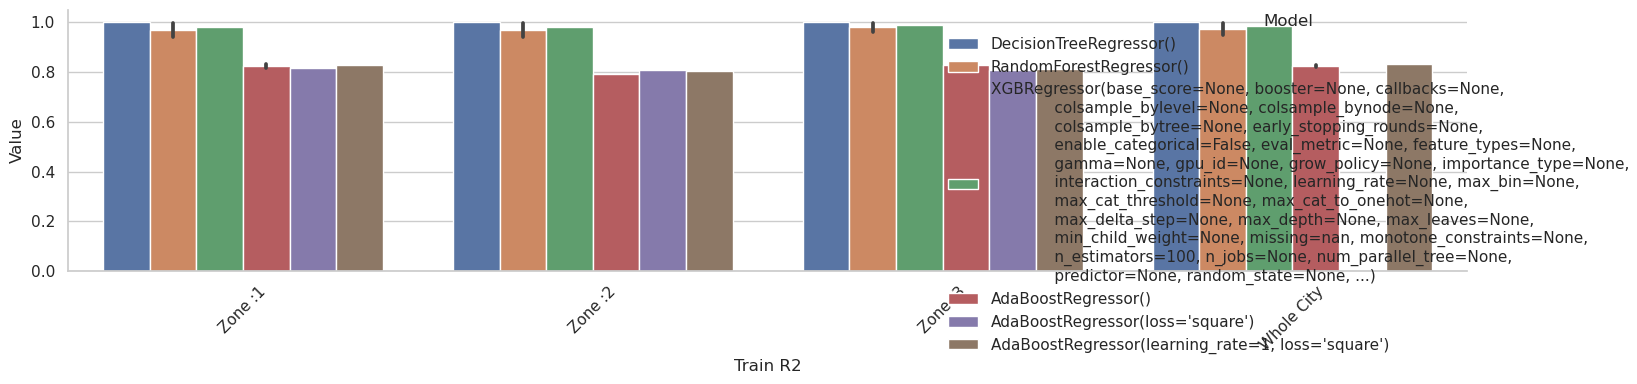

/home/chaker/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_6652/248893769.py:33: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


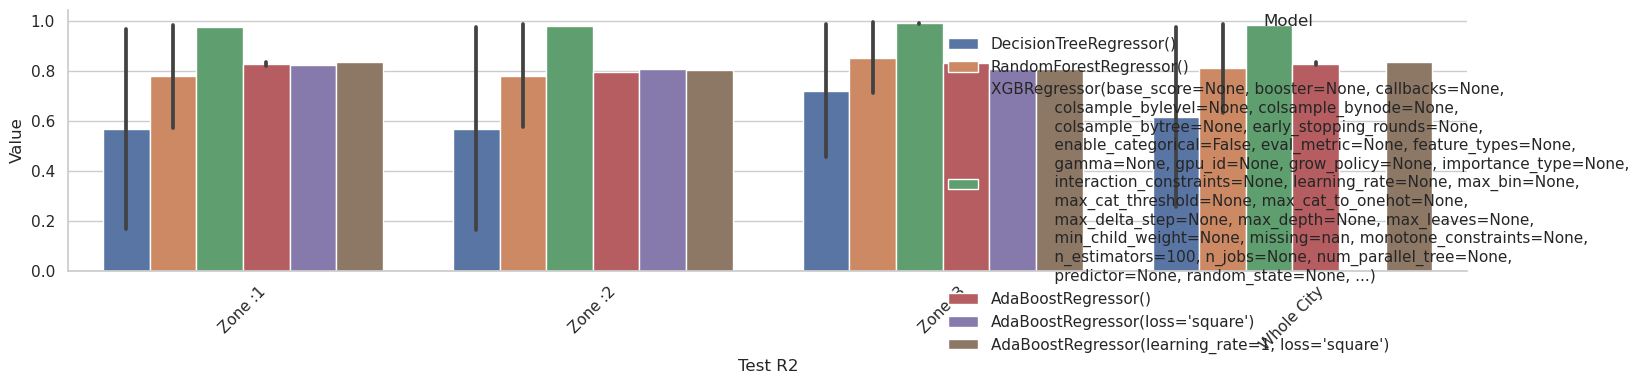

In [73]:
result_df = pd.DataFrame(models_results)

plot_results(preprocess_data(result_df))